# Лабораторная работа №2.3.
## Изучение спектров атома водорода и йода.

В работе исследуются: 
- А. Сериальные закономерности в оптическом спектре водорода
- Б. Спектр поглощения паров водорода в видимой области

## А. Изучение спектра атома водорода.
**Экспериментальная установка.** Для измерения длин волн спектральных линий в работе используется стеклянно-призменный монохроматор-спектрометр УМ-2 (универсальный монохроматор), предназначенный для спектральных исследований в диапазоне от 0,38 до 1,00 мкм.
![Схема экспериментальной установки](./images/1.png)

Условные обозначения:  
*1 - Входная щель, 2 - Коллиматорный объектив, 3 - Спектральная призма, 4 - Объектив, 5 - Окуляр, 6 - Поворотный столик, 7 - Отсчётный барабан, 8,9 - Микрометрический винт, 10 - Острие указателя, 11 - Массивный корпус, П<sub>1</sub>,П<sub>2</sub>,П<sub>3</sub> - призмы, Л - источник света, К - конденсор*

**Водородная лампа.** В опытах по измерению длин волн балмеровской серии источником света служит водородная трубка H-образной формы, питаемая от источника высокого напряжения.  
Следует отметить, что в спектре водородной лампы наряду с линиями атомного спектра наблюдается также спектр молекулярного водорода. Однако интенсивность молекулярных линий значительно слабее и отождествление ярких атомных линий на фоне молекулярного спектра не представляет большого труда.

## Б. Изучение молекулярного спектра йода
Молекулярный спектр поглощения паров йода можно наблюдать, используя:  
1. источник сплошного спектра - лампу накаливания
2. поглощающую среду - кювету с исследуемым веществом
3. спектральный прибор, регистрирующий спектр поглощения - монохроматор УМ-2

![Схема экспериментальной установки](./images/2.png)
Условные обозначения:  
*1 - Лампа накаливания, 2 - Блок питания, 3 - Кювета, 4 - Линза*

В нашей работе спектр поглощения паров йода наблюдается визуально на фоне сплошного спектра лампы накаливания 1, питаемой от блока питания 2 (рис.5).  

Кювета 3 с кристаллами йода подогревается нихромовой спиралью, подключённой вместе с лампой накаливания к блоку питания. Линза 4 используется как конденсор.  

В результате подогрева кристаллы йода частично возгоняются, образуя пары с лёгкой фиолетовой окраской. Спектрометр позволяет визуально наблюдать линии поглощения молекул йода на фоне сплошного спектра излучения лампы накаливания видимой области (рис.4).
![Схема экспериментальной установки](./images/3.png)

## Ход работы
1. Калибруем барабан спектрометра по спектрам неона и ртути.
2. Определяем координаты линий бальмеровской серии атомарного водорода; по результатам измерений рассчитываем постоянную Ридберга;
3. Определяем координаты нескольких линий молекулярного спектра йода; по результатам измерений вычисляем энергию колебательного кванта молекулы йода и энергию ее диссоциации в основном и возбужденном состояниях.

## Обработка результатов

Занесем данные, измеренные в ходе лабораторной работы и подключим все необходимые библиотеки.

In [1]:
import pandas as pd # Для хранения данных
import matplotlib.pyplot as plt # Для построения графиков
import numpy as np # Для квадратного корня и не только
from lmfit import Model # Для интерполяции

Добавим основные погрешности:

In [2]:
sigma_units = 2 # Погрешность шкалы микрометрического винта с отсчётным винтом
sigma_lambda = 0.5 # Погрешность длины волны

In [3]:
neon = pd.DataFrame()
neon['N'] = [22, 17, 15, 9, 23, 24, 25, 21, 20, 19, 18, 16, 15, 14, 13, 12, 11, 10, 8, 7, 6, 5, 4, 3, 2, 1]
neon[r'$\lambda, \unicode[italic]{xC5}$'] = [5852, 6074, 6143, 6383, 5401, 5341, 5331, 5882, 5945, 5976, 6030, 6096, 6143, 6164, 6217, 6267, 6305, 6334, 6402, 6507, 6533, 6599, 6678, 6717, 6929, 7032]
neon[r'$\sigma$($\lambda$), $\unicode[italic]{xC5}$'] = [sigma_lambda] * len(neon['N'])
neon['units'] = [2502, 2605, 2634, 2731, 2242, 2203, 2194, 2518, 2548, 2560, 2586, 2616, 2634, 2644, 2664, 2684, 2700, 2710, 2740, 2776, 2784, 2810, 2834, 2844, 2912, 2942]
neon[r'$\sigma$(units)'] = [sigma_units] * len(neon['N'])
neon.sort_values('N', inplace=True)
neon

N  $\lambda, \unicode[italic]{xC5}$  \
25   1                              7032   
24   2                              6929   
23   3                              6717   
22   4                              6678   
21   5                              6599   
20   6                              6533   
19   7                              6507   
18   8                              6402   
3    9                              6383   
17  10                              6334   
16  11                              6305   
15  12                              6267   
14  13                              6217   
13  14                              6164   
12  15                              6143   
2   15                              6143   
11  16                              6096   
1   17                              6074   
10  18                              6030   
9   19                              5976   
8   20                              5945   
7   21                              5882   
0   22                              5852   
4   23                              5401   
5   24                              5341   
6   25                              5331   

    $\sigma$($\lambda$), $\unicode[italic]{xC5}$  units  $\sigma$(units)  
25                                           0.5   2942                2  
24                                           0.5   2912                2  
23                                           0.5   2844                2  
22                                           0.5   2834                2  
21                                           0.5   2810                2  
20                                           0.5   2784                2  
19                                           0.5   2776                2  
18                                           0.5   2740                2  
3                                            0.5   2731                2  
17                                           0.5   2710                2  
16                                           0.5   2700                2  
15                                           0.5   2684                2  
14                                           0.5   2664                2  
13                                           0.5   2644                2  
12                                           0.5   2634                2  
2                                            0.5   2634                2  
11                                           0.5   2616                2  
1                                            0.5   2605                2  
10                                           0.5   2586                2  
9                                            0.5   2560                2  
8                                            0.5   2548                2  
7                                            0.5   2518                2  
0                                            0.5   2502                2  
4                                            0.5   2242                2  
5                                            0.5   2203                2  
6                                            0.5   2194                2

In [4]:
mercury = pd.DataFrame()
mercury['N'] = [4, 6, 3, 2, 1, 'K2', 'K1']
mercury[r'$\lambda, \unicode[italic]{xC5}$'] = [4916, 4047, 5461, 5770, 5791, 6234, 6907]
mercury[r'$\sigma$($\lambda$), $\unicode[italic]{xC5}$'] = [sigma_lambda] * len(mercury['N'])
mercury['units'] = [1862, 1200, 2282, 2462, 2472, 2620, 2904]
mercury[r'$\sigma$(units)'] = [sigma_units] * len(mercury['N'])
mercury.sort_values('units', inplace=True)
mercury

N  $\lambda, \unicode[italic]{xC5}$  \
1   6                              4047   
0   4                              4916   
2   3                              5461   
3   2                              5770   
4   1                              5791   
5  K2                              6234   
6  K1                              6907   

   $\sigma$($\lambda$), $\unicode[italic]{xC5}$  units  $\sigma$(units)  
1                                           0.5   1200                2  
0                                           0.5   1862                2  
2                                           0.5   2282                2  
3                                           0.5   2462                2  
4                                           0.5   2472                2  
5                                           0.5   2620                2  
6                                           0.5   2904                2

In [5]:
hydrogen = pd.DataFrame()
hydrogen['N'] = ['H_alpha', 'H_betta', 'H_gamma']
hydrogen[r'$\lambda, \unicode[italic]{xC5}$'] = [6562.8, 4861.3, 4340.5]
hydrogen[r'$\sigma$($\lambda$), $\unicode[italic]{xC5}$'] = [sigma_lambda] * len(hydrogen['N'])
hydrogen['units'] = [2792, 1806, 1120]
hydrogen[r'$\sigma$(units)'] = [sigma_units] * len(hydrogen['N'])
hydrogen

N  $\lambda, \unicode[italic]{xC5}$  \
0  H_alpha                            6562.8   
1  H_betta                            4861.3   
2  H_gamma                            4340.5   

   $\sigma$($\lambda$), $\unicode[italic]{xC5}$  units  $\sigma$(units)  
0                                           0.5   2792                2  
1                                           0.5   1806                2  
2                                           0.5   1120                2

In [6]:
iodine = pd.DataFrame()
iodine['units'] = [2642, 2552, 2004]
iodine[r'$\sigma$(units)'] = [sigma_units] * len(iodine['units'])

Проинтерполируем зависимость кривой: $a \cdot x^3 + b \cdot x^2 + c \cdot x + d$

In [7]:
def linear(x, k, b):
    return k * x + b

def cube(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d

def fit(x, y):
    lmodel = Model(cube)
    result = lmodel.fit(y, x=x, a=4e-7, b=-0.002, c=3.3, d=2230)

    plt.figure(figsize=(14, 10))
    plt.xlabel(r'Условные единицы', fontsize=20)
    plt.ylabel(r'$\lambda$, Ангстрем', fontsize=20)
    plt.axis([2150, 2850, 5300, 6800])
    plt.plot(x, y, 'bo', label='initial points')
    plt.title(r'График зависимости длины волны от шкалы микрометрического винта', fontsize=20)
    #plt.plot(x, result.init_fit, 'k--', label='initial fit')
    plt.plot(x, result.best_fit, 'r-', label='best fit')
    plt.legend(fontsize=20, loc='best')
    plt.show()
    
    return result.fit_report(), result.params

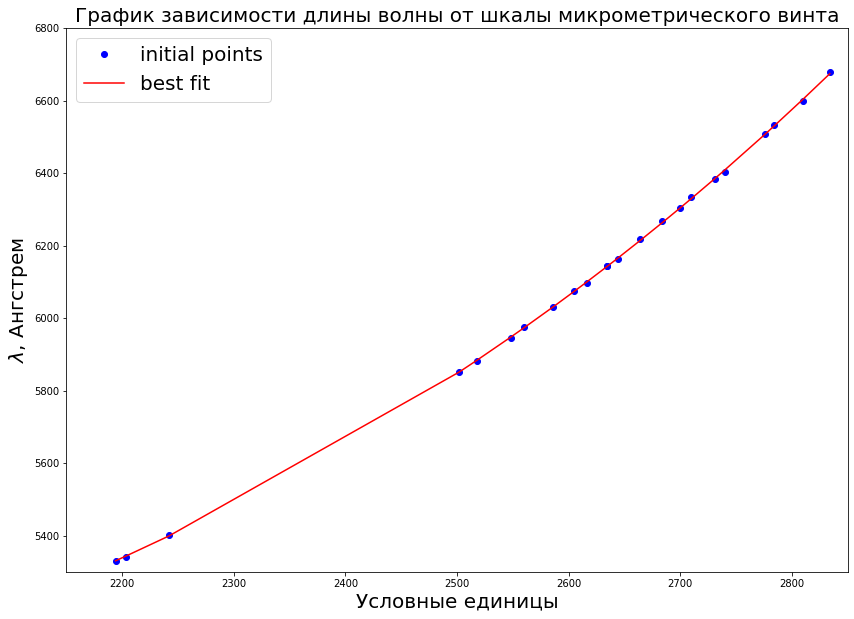

[[Model]]
    Model(cube)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 23
    # variables        = 4
    chi-square         = 181.710113
    reduced chi-square = 9.56369017
    Akaike info crit   = 55.5391236
    Bayesian info crit = 60.0811005
[[Variables]]
    a:  3.9240e-07 +/- 1.6437e-07 (41.89%) (init = 4e-07)
    b: -0.00172404 +/- 0.00124718 (72.34%) (init = -0.002)
    c:  3.28811683 +/- 3.14153071 (95.54%) (init = 3.3)
    d:  2270.94975 +/- 2625.95399 (115.63%) (init = 2230)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, d) = -1.000
    C(b, c) = -1.000
    C(a, b) = -1.000
    C(b, d) =  1.000
    C(a, c) =  1.000
    C(a, d) = -0.999


In [8]:
x = neon['units'][3:]
y = neon[r'$\lambda, \unicode[italic]{xC5}$'][3:]
report, res = fit(x, y)
print(report)

Определим длины волн линий $H_\alpha$, $H_\beta$, $H_\gamma$ с помощью калибровочного графика и рассчитаем погрешность по формуле: $\sigma_x = \sqrt{(3ax^2 + 2bx + c)^2 \cdot \sigma_x^2 + x^6 \cdot \sigma_a^2 + x^4 \cdot \sigma_b^2 + x^2 \cdot \sigma_c^2 + \sigma_d^2}$

In [9]:
predictions = np.array([])
initial = np.array(hydrogen['units'])
predictions = cube(initial, res['a'], res['b'], res['c'], res['d'])
sigma_predictions = np.sqrt(((3 * res['a'] * initial ** 2 + 2 * res['b'] * initial + res['c']) ** 2 \
                            * hydrogen[r'$\sigma$(units)'] ** 2) + \
initial ** 6 * res['a'].stderr ** 2 + \
initial ** 4 * res['b'].stderr ** 2 + \
initial ** 2 * res['c'].stderr ** 2 + \
res['d'].stderr ** 2)
print(predictions)
print(sigma_predictions)

[6552.44491105 4897.56193412 4342.30687708]
0    13348.698389
1     7454.762102
2     4666.524232
Name: $\sigma$(units), dtype: float64


Сравним с полученными значениями и оценим адекватность погрешности (надо переделать)

In [10]:
hydrogen[r'$\lambda, \unicode[italic]{xC5}$']

0    6562.8
1    4861.3
2    4340.5
Name: $\lambda, \unicode[italic]{xC5}$, dtype: float64

20867.832794567155


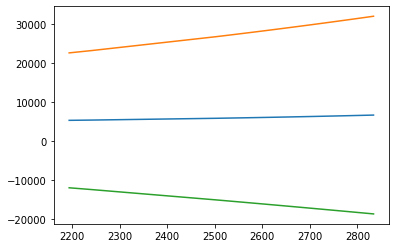

In [11]:
a_max = res['a'] + res['a'].stderr
b_max = res['b'] + res['b'].stderr
c_max = res['c'] + res['c'].stderr
d_max = res['d'] + res['d'].stderr

a_min = res['a'] - res['a'].stderr
b_min = res['b'] - res['b'].stderr
c_min = res['c'] - res['c'].stderr
d_min = res['d'] - res['d'].stderr

ind_max = np.argmax((cube(x, res['a'], res['b'], res['c'], res['d']) \
                 - cube(x, a_max, b_max, c_max, d_max)) ** 2)
ind_min = np.argmax((cube(x, res['a'], res['b'], res['c'], res['d']) \
                 - cube(x, a_min, b_min, c_min, d_min)) ** 2)

dist_max = abs(cube(x[ind_max], res['a'], res['b'], res['c'], res['d']) \
                 - cube(x[ind_max], a_max, b_max, c_max, d_max))
dist_min = abs(cube(x[ind_min], res['a'], res['b'], res['c'], res['d']) \
                 - cube(x[ind_min], a_max, b_max, c_max, d_max))
print(max(dist_max, dist_min))
plt.plot(x, cube(x, res['a'], res['b'], res['c'], res['d']))
plt.plot(x, cube(x, a_max, b_max, c_max, d_max))
plt.plot(x, cube(x, a_min, b_min, c_min, d_min))

Тут тоже погрешность огромная...

Убедимся в том, что отношение длин волн водородных линий соответствуют формуле сериальной закономерности. Для каждой из наблюдаемых линий вычислим значение постоянной Ридберга, определим её среднее значение по всем измерениям и оценим погрешность измерения.

In [12]:
nu1 = (1/2**2-1/3**2)
nu2 = (1/2**2-1/4**2)
nu3 = (1/2**2-1/5**2)
koeffs = np.array([nu1, nu2, nu3])
R = 1/koeffs/predictions/1e-10
avg = sum(R)/len(R)
print(avg)
r = np.array([predictions[0]/predictions[1], predictions[0]/predictions[2], predictions[1]/predictions[2]])
s = np.array([nu2/nu1, nu3/nu1, nu3/nu2])
print(r, s)

10948112.90547892
[1.33789935 1.50897785 1.12787098] [1.35  1.512 1.12 ]


In [16]:
iodine_units = np.array(iodine['units'])
iodine_angstrms = cube(iodine_units, res['a'], res['b'], res['c'], res['d'])
h = 6.62E-34
c = 3E8
E = h*c/iodine_angstrms/1e-10
E1 = 0.027
E2 = (E[1]-E[0])/5*6.242E18
print(f"E2 for I {E2:5.3e} eV")
print(E1-E2)
print(-E2+E[0]*6.242E18)

E2 for I 1.383e-02 eV
0.013172109246868393
1.9984060414053435
